<a href="https://colab.research.google.com/github/ZestyZeeshan/ML-X/blob/main/Copy_of_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

# Import necessary libraries

In [ ]:
import numpy as np # for numerical data and arrays
import matplotlib.pyplot as plt # for visualizing data
import pandas as pd # for loading dataset and creating dataframe

# Load the dataset

In [ ]:
from google.colab import files
upload=files.upload()

Saving video games.csv to video games.csv


In [ ]:
df=pd.read_csv('video games.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape # Shape of dataset

(16598, 11)

# Begin Analysis

Let us check for null values first.

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Year and publisher seem to have null values.

Let us also get more information about the columns like datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


For the numeric datatypes, we can get some useful stats which will help us analyse the data better.

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


So, from the above table we see that the data is from year 1980 to 2020.
Also, we see the stats region-wise (NA, EU, JP, Other) as well as the global sales. NA sales seem to be the highest and JP is the lowest.

We saw some null values before. We can impute the null values and fill them. It won't be 100% accurate but it will be a good approximation for us to work with. Since the null values were in the year and Publisher, we can use mode to impute the null values.
<br>
Let us save it to a new dataframe.

In [ ]:
df1 = df.copy()
df1.Year = df1.Year.fillna(df1.Year.mode()[0])
df1.Publisher =df1.Publisher.fillna(df1.Publisher.mode()[0])

In [ ]:
df1.isnull().sum() # Checking for null values again

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Visualizations

Let us see which genre had the most sales.

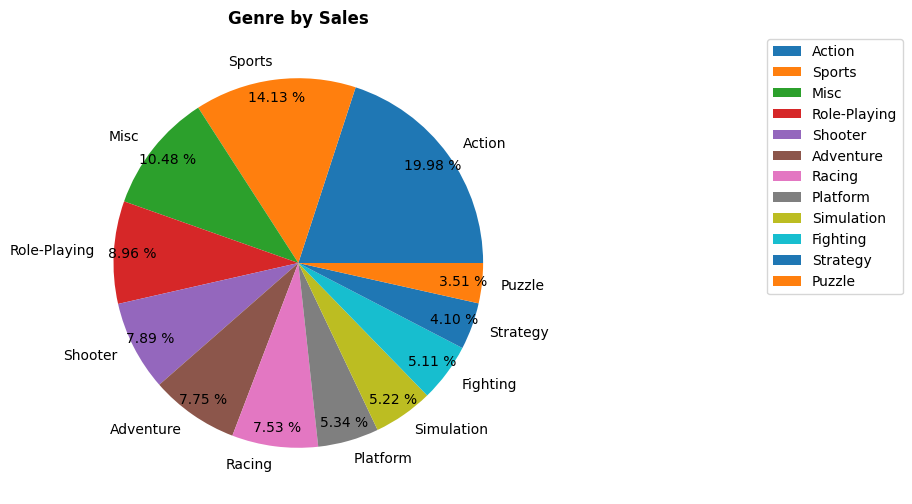

In [ ]:
genre = df1.Genre.value_counts().values
labels =df1.Genre.value_counts().index
plt.figure(figsize=(6, 6))
plt.title('Genre by Sales',fontdict={'fontweight':'bold'})
plt.pie(genre,labels=labels,autopct='%.2f %%',pctdistance=0.9)
plt.legend(bbox_to_anchor=(1.5,1.0),loc='upper left')
plt.show()

<b> Action </b> seems to have highest sales followed by <b> Sports </b>. <b>Puzzle</b> is the least sold genre.

Let us now visualize the top 10 years of sales.

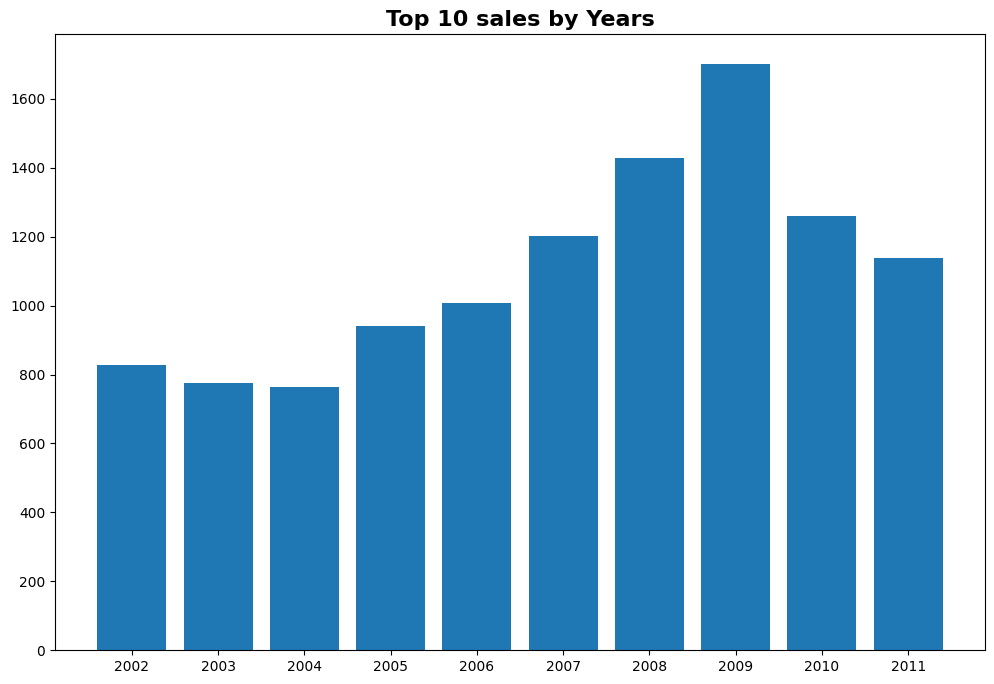

In [ ]:
year= df1.Year.value_counts().head(10)
plt.figure(figsize=(12,8))

plt.xticks(year.index)
plt.title('Top 10 sales by Years',fontdict={'fontweight':'bold','fontsize':16})

plt.bar(year.index,year.values)
plt.show()

Year <b> 2009 </b> seems to have the highest sales.

Now let us see which platform / console made the highest sales.

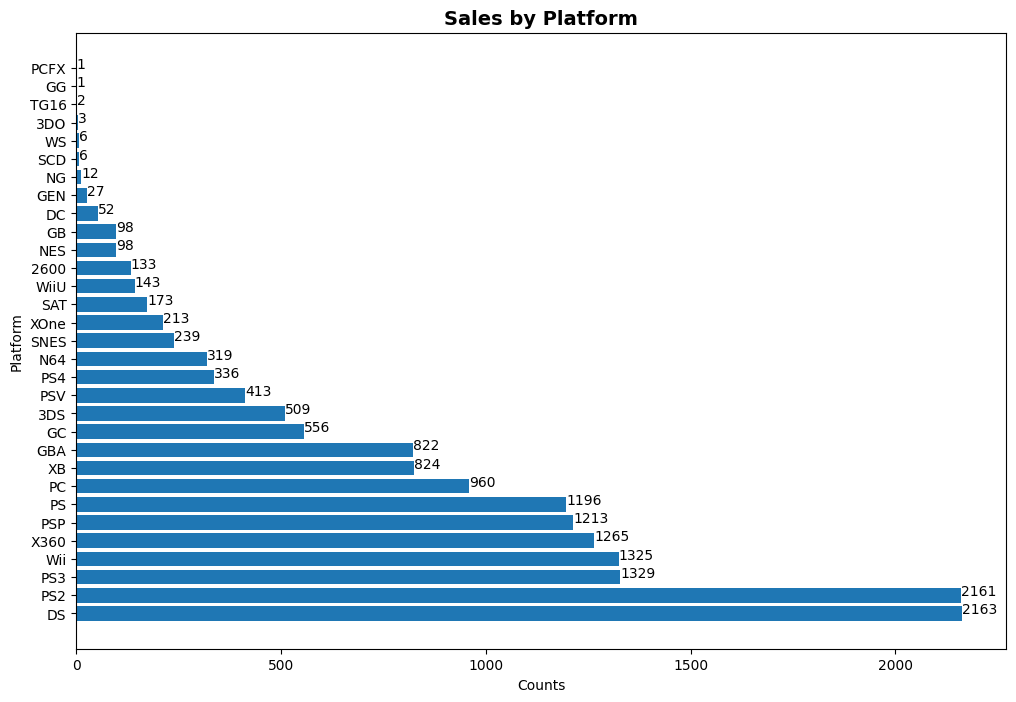

In [ ]:
platform = df1.Platform.value_counts()
plt.figure(figsize=(12,8))

plt.barh(platform.index,platform.values)

for i,v in enumerate(platform.values):
    plt.text(v,i,str(v))

plt.title('Sales by Platform',fontdict={'fontweight':'bold','fontsize':'14'})
plt.xlabel('Counts')
plt.ylabel("Platform")

plt.show()

Nintendo <b> DS </b> is in the lead with Sony's <b> PS2 </b> right behind it.

Let us now visualize the sales by countries.

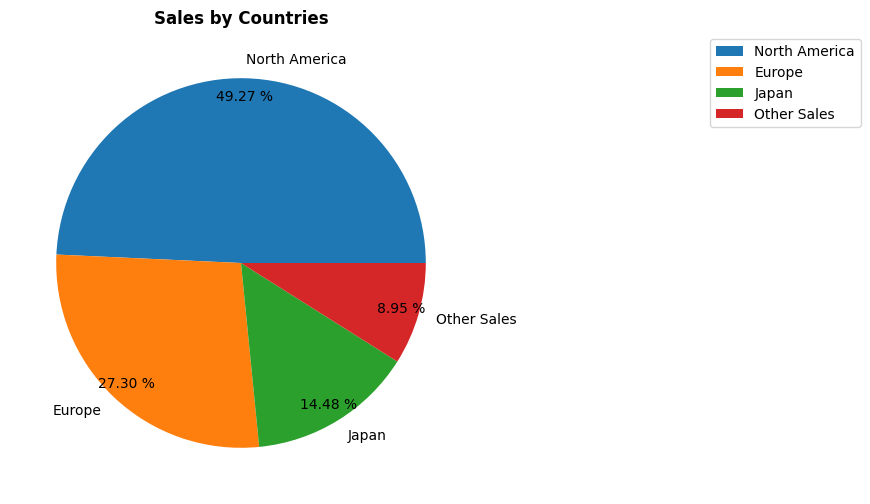

In [ ]:
a = df1.NA_Sales.sum().round()
b = df1.EU_Sales.sum().round()
c = df1.JP_Sales.sum().round()
d = df1.Other_Sales.sum().round()
e = df1.Global_Sales.sum().round()
values = [a,b,c,d]
labels=['North America','Europe','Japan','Other Sales']

plt.figure(figsize=(6, 6))
plt.title('Sales by Countries',fontdict={'fontweight':'bold'})
plt.pie(values,labels=labels,autopct='%.2f %%',pctdistance=0.9)
plt.legend(bbox_to_anchor=(1.5,1.0),loc='upper left')
plt.show()

<b> NA </b> is clearly in the lead with almost 50% sales recorded.

A new dataset for video games sales analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Importing our dataset in our google colab
dataset link https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games/code .
following steps how we import

In [3]:
from google.colab import files
upload=files.upload()

Saving video games new.csv to video games new.csv


In [4]:
df=pd.read_csv('video games new.csv')
df.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


**DATA CLEANING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20803 non-null  int64  
 1   name         20803 non-null  object 
 2   url          20803 non-null  object 
 3   year         20536 non-null  float64
 4   certificate  7903 non-null   object 
 5   rating       11600 non-null  float64
 6   votes        11600 non-null  object 
 7   plot         20803 non-null  object 
 8   Action       20803 non-null  bool   
 9   Adventure    20803 non-null  bool   
 10  Comedy       20803 non-null  bool   
 11  Crime        20803 non-null  bool   
 12  Family       20803 non-null  bool   
 13  Fantasy      20803 non-null  bool   
 14  Mystery      20803 non-null  bool   
 15  Sci-Fi       20803 non-null  bool   
 16  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
df['votes'].head(2)

0    20,759
1    35,703
Name: votes, dtype: object

As we can see, we have commas in votes means its not in proper format(int or float), so we need to transform it in proper data type.


In [7]:
# first, replace comma (,) with '' then convert it into int
df['votes'] = df['votes'].str.replace(',', '').astype(np.float)
df['votes'] = df['votes'].round(2)

# drop the unused column
df.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-7-ab9e666dcb2b>:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



there are multiple duplicates in our dataset

In [8]:
df[(df['name'] == 'Grand Theft Auto V') & (df['year'] == 2013)]

,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,59986.0,Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
15914,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,59996.0,Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False


In [9]:
df.drop_duplicates(['year', 'name'], keep='last', inplace = True)

In [10]:
df[(df['name'] == 'Grand Theft Auto V') & (df['year'] == 2013)]

,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
15914,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,59996.0,Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False


> transforming genres We need to shape df from wide to long, we can do this in multiple steps showed below.

In [11]:
# first replace true false values for genres with 0 and 1
df.replace({False : 0, True : 1}, inplace = True)
# then create another dataframe by melt function as showed below.
df_genre = df.melt(id_vars=['name'], value_vars=['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller'])
df_genre.head()

,name,variable,value
0,Ghost of Tsushima,Action,1
1,Uncharted: Drake's Fortune,Action,1
2,God of War: Ragnarök,Action,1
3,Far Cry 3,Action,1
4,Fallout: New Vegas,Action,1


In [12]:
df_genre[df_genre['name'] == 'Grand Theft Auto V']

,name,variable,value
15239,Grand Theft Auto V,Action,1
35334,Grand Theft Auto V,Adventure,0
55429,Grand Theft Auto V,Comedy,0
75524,Grand Theft Auto V,Crime,1
95619,Grand Theft Auto V,Family,0
115714,Grand Theft Auto V,Fantasy,0
135809,Grand Theft Auto V,Mystery,0
155904,Grand Theft Auto V,Sci-Fi,0
175999,Grand Theft Auto V,Thriller,0


> we have seen above that gta 5 have only 2 genres, so we need to remove unnecessary rows (having 'value' =0)

In [13]:
df_genre.drop(df_genre.index[df_genre['value'] == 0], inplace = True)

In [14]:
df_genre[df_genre['name'] == 'Grand Theft Auto V']

,name,variable,value
15239,Grand Theft Auto V,Action,1
75524,Grand Theft Auto V,Crime,1


> now lets merge it with original df

In [15]:
df = pd.merge(df, df_genre, on = 'name')

In [16]:
df.head()

,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,variable,value
0,Ghost of Tsushima,https://www.imdb.com/title/tt7651352/?ref_=adv...,2020.0,M,9.3,8452.0,"Set in 1274 on the Tsushima Island, the last s...",1,1,0,0,0,0,0,0,0,Action,1
1,Ghost of Tsushima,https://www.imdb.com/title/tt7651352/?ref_=adv...,2020.0,M,9.3,8452.0,"Set in 1274 on the Tsushima Island, the last s...",1,1,0,0,0,0,0,0,0,Adventure,1
2,Uncharted: Drake's Fortune,https://www.imdb.com/title/tt1000777/?ref_=adv...,2007.0,T,8.5,20343.0,"Treasure hunter Nathan Drake, embarks in the a...",1,1,0,0,0,1,0,0,0,Action,1
3,Uncharted: Drake's Fortune,https://www.imdb.com/title/tt1000777/?ref_=adv...,2007.0,T,8.5,20343.0,"Treasure hunter Nathan Drake, embarks in the a...",1,1,0,0,0,1,0,0,0,Adventure,1
4,Uncharted: Drake's Fortune,https://www.imdb.com/title/tt1000777/?ref_=adv...,2007.0,T,8.5,20343.0,"Treasure hunter Nathan Drake, embarks in the a...",1,1,0,0,0,1,0,0,0,Fantasy,1


>Some of games have no rating and votes (which is must for future visualizations), as of now am dropping them

In [17]:
df.dropna(inplace=True)

2) DataVisualization

Top 3 selling games per year

Lets have a look at top 3 games released per year

In [18]:
top_selling_games = df.groupby(['year', 'name']).votes.mean().sort_values(ascending=False).reset_index()

In [19]:
top_selling_games = top_selling_games.groupby('year').head(3)

Top 3 selling games per year


In [29]:
!pip install plotly --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [36]:
fig = px.sunburst(top_selling_games, path= ['year', 'name'], values= 'votes', title='Top 3 selling games per year')
fig.update_layout(autosize = False, width = 1000, height = 800)
fig.show()


In [37]:
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame 'top_selling_games'
# Group the data by 'year' and calculate the sum of 'votes' for each year
yearly_votes = top_selling_games.groupby('year')['votes'].sum().reset_index()

# Create a pie chart from the grouped data
fig = px.pie(yearly_votes, names='year', values='votes', title='Total Votes Per Year')

# Show the pie chart
fig.show()


In [38]:
fig = px.scatter(data_frame=top_selling_games, x = 'year', y = 'votes', color = 'votes', size = 'votes',color_continuous_scale=px.colors.sequential.Sunset, hover_name='name', title = 'Votes over Year')
fig.update_layout(autosize = False, width = 1000, height = 800)
fig.show()